## Assignment-4-2: Linear Regression
### Problem Statement
#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
#### Salary_hike -> Build a prediction model for Salary_hike

### Import Libraries

In [366]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [367]:
salary_data=pd.read_csv("Salary_Data.csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [368]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [369]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#### No missing values found

In [370]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### EDA
#### Correlation ckeck

In [371]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### pearson correlation coefficient = .978 .Thatas are positively closely correlated

#### Data visualization

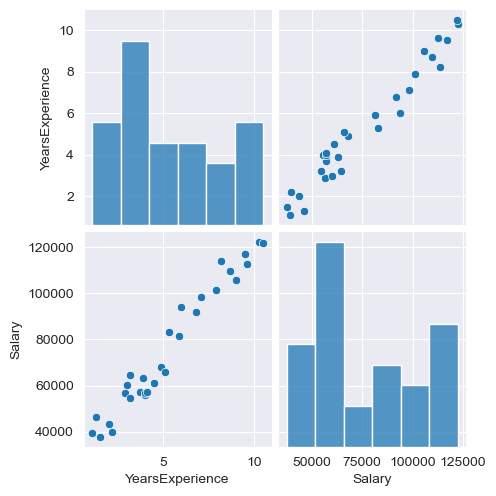

In [372]:
sns.set_style('darkgrid')
sns.pairplot(salary_data)

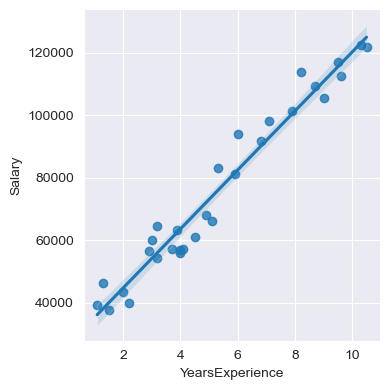

In [373]:
sns.lmplot(x='YearsExperience',y='Salary', data=salary_data,height=4)
plt.show()

Its clear from the plots that data keep linear relationship . Now lte's develope ols model

### OLS Modelling

In [374]:
model=smf.ols('Salary~YearsExperience',data=salary_data).fit()

In [375]:
model.rsquared ,model.aic

(0.9569566641435086, 606.882316930432)

In [376]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [377]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        19:48:54   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Our linear model is with r2value=.957 and AIC =606.9 which is quite satisfactory but still we will check for further improvement for the model

### Test for Outliers and Influencers

#### Cooks distance

row index = 23 
 cooks_max = 0.131754523131353


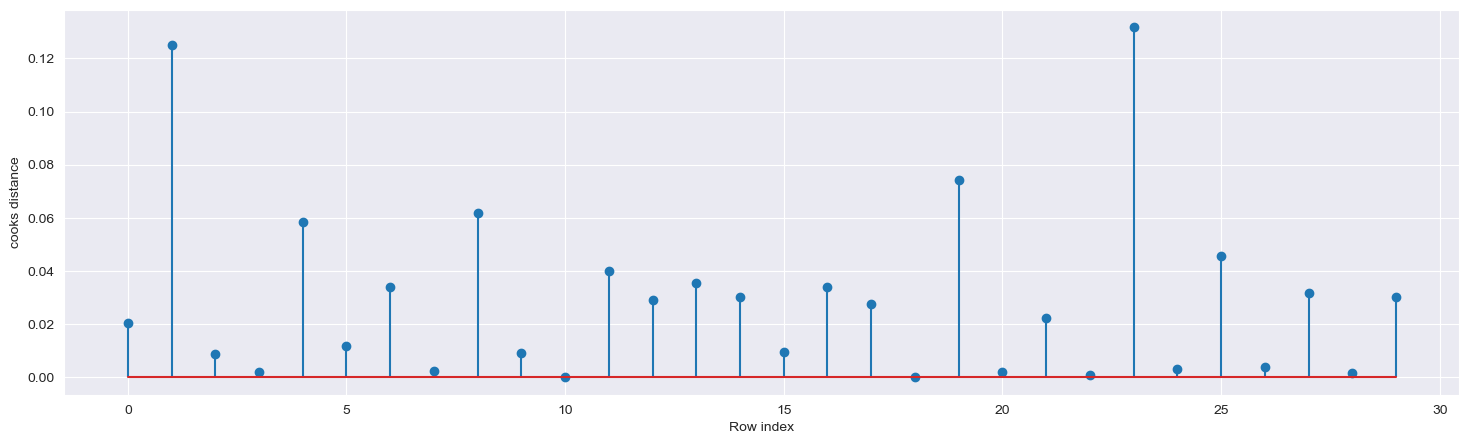

In [378]:
influence =model.get_influence()
(c,_)     =influence.cooks_distance

#stemplot for cooks disatnce
plt.subplots(figsize=(18,5))
plt.stem(np.arange(len(salary_data)),c)
plt.grid('darkgrid')
plt.xlabel('Row index')
plt.ylabel('cooks distance')
print('row index =',np.argmax(c),'\n','cooks_max =',c.max())

#### Influence plot

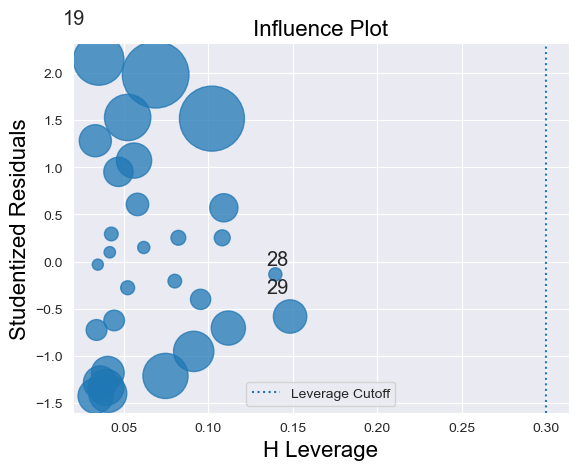

lev_cutoff = 0.3


In [379]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)

# leverage cutoff = 3(k+1)/n n-->observations ,k-->independent variables
n=salary_data.shape[0]
k=salary_data.shape[1]
lev_cutoff =3*(k+1)/n
plt.axvline(x=lev_cutoff,linestyle=':',label='Leverage Cutoff')
plt.legend()
plt.show()
print('lev_cutoff =',3*(k+1)/n)

#### From cooks distance and Influence plots it's evident that row indexed 1,19,23 are influencers , let's drop these rows and remodel

### Model Improvement

In [380]:
# droping influencers and remodelling
df1=salary_data
salary_data_1=df1.drop([1,19,23])
salary_data_2=salary_data_1.reset_index().drop(['index'],axis=1)
model2=smf.ols('Salary~YearsExperience',data=salary_data_2).fit()
print('r2_model2= ' ,model2.rsquared,'\n','AIC=',model2.aic )

r2_model2=  0.9688236828846021 
 AIC= 537.2098354692885


In [381]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     776.9
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           2.39e-20
Time:                        19:49:02   Log-Likelihood:                -266.60
No. Observations:                  27   AIC:                             537.2
Df Residuals:                      25   BIC:                             539.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.481e+04   2032.648     12.205      0.000    2.06e+04     2.9e+04
YearsExperience  9425.2902    338.154     27.873      0.000    8728.849    1.01e+04
==============================================================================
Omnibus:                        1.647   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.169
Skew:                           0.248   Prob(JB):                        0.557
Kurtosis:                       2.110   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check for cooks distance of model2

row index = 7 
 cooks_max = 0.12483964867178254


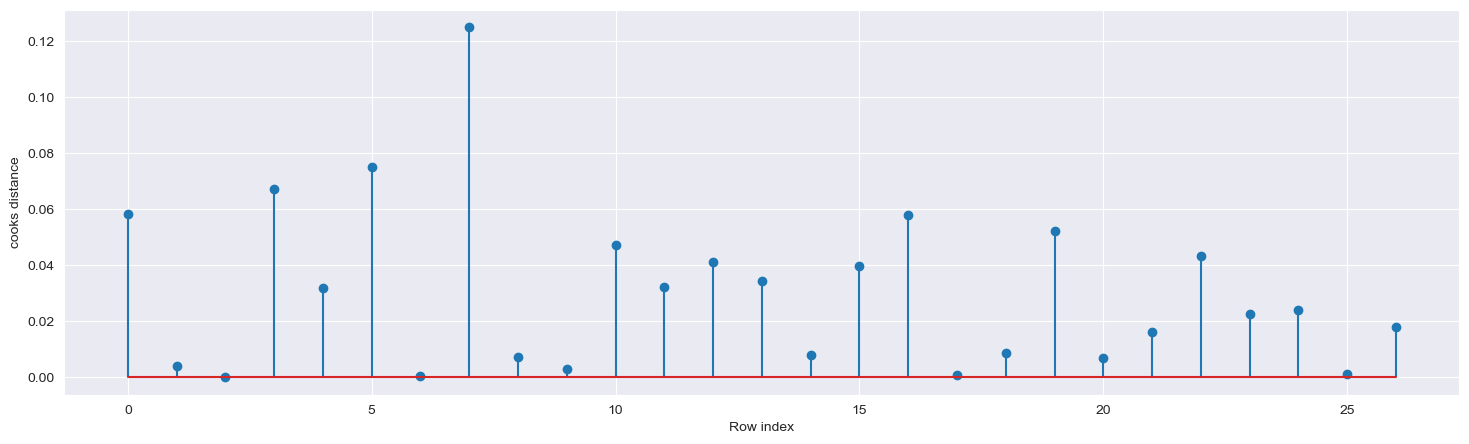

In [382]:
influence1 =model2.get_influence()
(c,_)      =influence1.cooks_distance

#stemplot for cooks disatnce
plt.subplots(figsize=(18,5))
plt.stem(np.arange(len(salary_data_2)),c)
plt.grid('darkgrid')
plt.xlabel('Row index')
plt.ylabel('cooks distance')
print('row index =',np.argmax(c),'\n','cooks_max =',c.max())

### Test for Normality of Residuals (qqplot &kdeplot)

<Axes: ylabel='Density'>

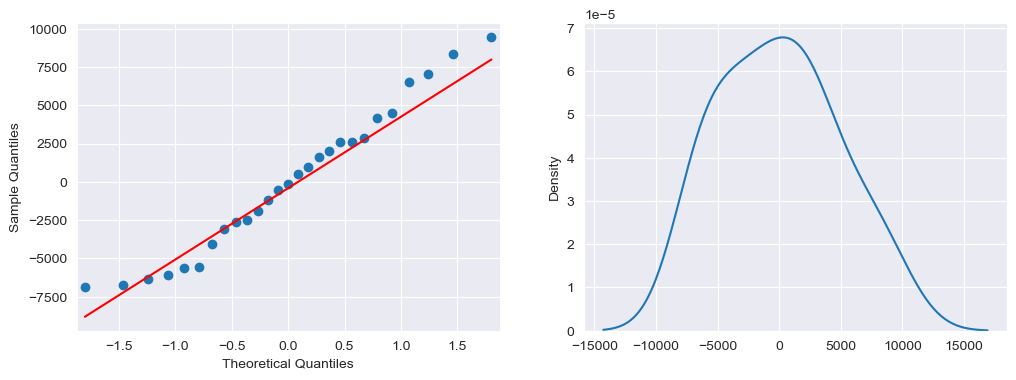

In [383]:
fig, axes=plt.subplots(figsize=(12,4),ncols=2)
sm.qqplot(model2.resid,line='q',ax=axes[0])
sns.kdeplot(model2.resid,ax=axes[1])

#### r2value  improved as .9688 and AIC reduced  to  537.2 which is a good sign. Now lets try with different transformations and check for the scope of improvement of our model

### Transformations

#### Square-root transformation

In [384]:
# On Regressor
df1=salary_data
salary_data_1=df1.drop([1,19,23])
salary_data_2=salary_data_1.reset_index().drop(['index'],axis=1)
model_sqrt1=smf.ols('Salary~np.sqrt(YearsExperience)',data=salary_data_2).fit()
print('r2_model3= ' ,model_sqrt1.rsquared,'\n','AIC=',model_sqrt1.aic )

r2_model3=  0.9456119144492309 
 AIC= 552.2349675807731


In [385]:
# On Responder Variable
df1=salary_data
salary_data_1=df1.drop([1,19,23])
salary_data_2=salary_data_1.reset_index().drop(['index'],axis=1)
model_sqrt2=smf.ols('np.sqrt(Salary)~YearsExperience',data=salary_data_2).fit()
print('r2_model3= ',model_sqrt2.rsquared,'\n','AIC=',model_sqrt2.aic )

r2_model3=  0.959995284480234 
 AIC= 202.9676780995295


In [386]:
# On Regressor and Response variable
df1=salary_data
salary_data_1=df1.drop([1,19,23])
salary_data_2=salary_data_1.reset_index().drop(['index'],axis=1)
model_sqrt3=smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)',data=salary_data_2).fit()
print('r2_model3= ' ,model_sqrt3.rsquared,'\n','AIC=',model_sqrt1.aic )

r2_model3=  0.955944881289257 
 AIC= 552.2349675807731


#### log transformation

In [387]:
# On Regressor
df1=salary_data
salary_data_1=df1.drop([1,29,19])
salary_data_2=salary_data_1.reset_index().drop(['index'],axis=1)
model_log1=smf.ols('Salary~np.log(YearsExperience)',data=salary_data_2).fit()
print('r2_model4= ' ,model_log1.rsquared,'\n','AIC=',model_log1.aic )

r2_model4=  0.8639190238999023 
 AIC= 576.001557913611


In [388]:
# On Response variable
df1=salary_data
salary_data_1=df1.drop([1,29,19])
salary_data_2=salary_data_1.reset_index().drop(['index'],axis=1)
model_log2=smf.ols('np.log(Salary)~YearsExperience',data=salary_data_2).fit()
print('r2_model4= ' ,model_log2.rsquared,'\n','AIC=',model_log2.aic )

r2_model4=  0.9378243591841987 
 AIC= -50.42966313782824


In [389]:
# On both Regressor and Response variable
df1=salary_data
salary_data_1=df1.drop([1,29,19])
salary_data_2=salary_data_1.reset_index().drop(['index'],axis=1)
model_log3=smf.ols(formula='np.log(Salary)~np.log(YearsExperience)',data=salary_data_2).fit()
print('r2_model4= ' ,model_log3.rsquared,'\n','AIC=',model_log3.aic)

r2_model4=  0.9195605362407884 
 AIC= -43.47603987698288


#### Comparing all the models it looks like model_log2 is improssing since it gives an AIC value of -50.mlets check the cooks distance for this model

row index = 3 
 cooks_max = 0.1810446609737173


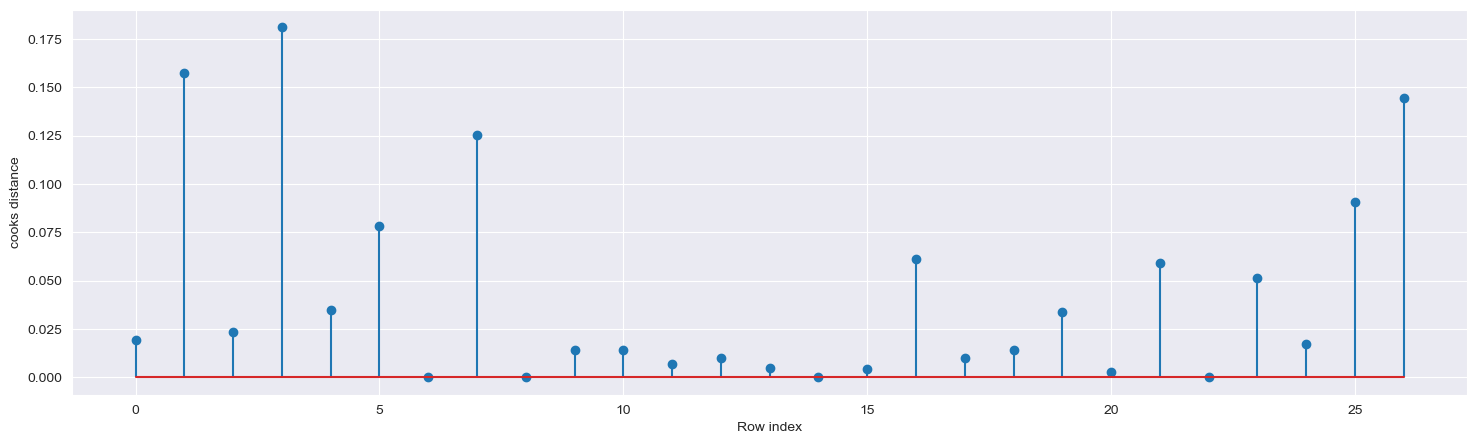

In [390]:
influence1 =model_log2.get_influence()
(c,_)      =influence1.cooks_distance

#stemplot for cooks disatnce
plt.subplots(figsize=(18,5))
plt.stem(np.arange(len(salary_data_2)),c)
plt.grid('darkgrid')
plt.xlabel('Row index')
plt.ylabel('cooks distance')
print('row index =',np.argmax(c),'\n','cooks_max =',c.max())

In [391]:
model_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     377.1
Date:                Sun, 09 Jul 2023   Prob (F-statistic):           1.35e-16
Time:                        19:49:22   Log-Likelihood:                 27.215
No. Observations:                  27   AIC:                            -50.43
Df Residuals:                      25   BIC:                            -47.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.4817      0.039    267.836      0.000      10.401      10.562
YearsExperience     0.1293      0.007     19.419      0.000       0.116       0.143
==============================================================================
Omnibus:                        0.751   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.791
Skew:                           0.245   Prob(JB):                        0.673
Kurtosis:                       2.319   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Test for Normality of Residuals (qqplot &kdeplot)


<Axes: ylabel='Density'>

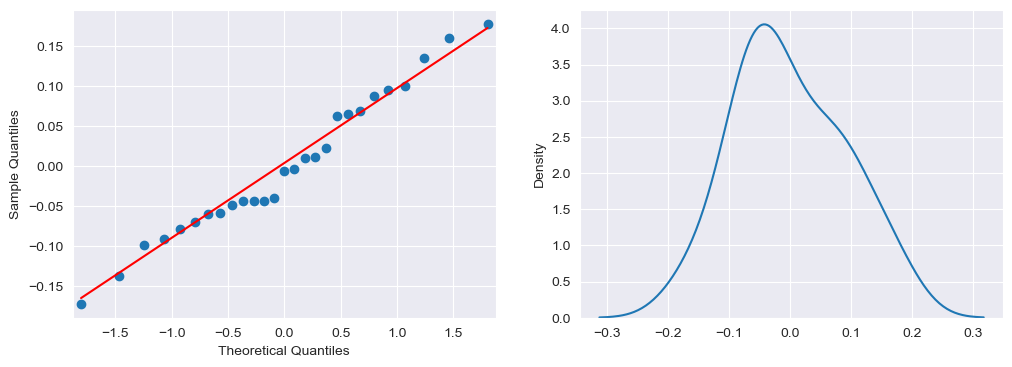

In [392]:
fig, axes=plt.subplots(figsize=(12,4),ncols=2)
sm.qqplot(model_log2.resid,line='q',ax=axes[0])
sns.kdeplot(model_log2.resid,ax=axes[1])

### Final OLS Model

In [393]:
salary_data_ols = model_log2
print('r2_model4= ' ,model_log2.rsquared,'\n','AIC=',model_log2.aic )

r2_model4=  0.9378243591841987 
 AIC= -50.42966313782824


In [394]:
salary_data_ols.params

Intercept          10.481744
YearsExperience     0.129309
dtype: float64

### Prediction
#### Let's predict Salary for a set of YearsExperience values

In [395]:
YearsExperience={'YearsExperience':[10,11,12,13]}
to_pred=pd.DataFrame(YearsExperience)
predicted_salary = np.exp(salary_data_ols.predict(to_pred))
pd.DataFrame({'YearsExperience':[10,11,12,13],'Salary':predicted_salary})

,YearsExperience,Salary
0,10,129941.009446
1,11,147878.320946
2,12,168291.734064
3,13,191523.054720


### Conclusion:
#### Successfully modelled OLS model with the given data to predict salary